In [2]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    
    def __init__(self,k=5,max_itr=100,plot_steps=True):
        self.k=k
        self.max_itr=max_itr
        self.clusters=[[] for _ in range(k)]
        self.centroids=[]
        self.plot_steps = plot_steps
        
    def predict(self,x):
        self.x=x
        self.n_samples,self.n_features=x.shape
        
        random_sample_idx=np.random.choice(self.n_samples,self.k,replace=False)
        self.centroids=[self.x[idx] for idx in random_sample_idx]
        
        for _ in range(self.max_itr):
            self.clusters=self.create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            centroids_old=self.centroids
            self.centroids=self.get_centroids(self.clusters)
            
            if(self.is_converged(centroids_old,self.centroids)):
                break
                
            if self.plot_steps:
                self.plot()
                
        return self.get_cluster_labels(self.clusters) 
    
    def get_cluster_labels(self,clusters):
        labels=np.empty(self.n_samples)
        for idx,cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx]=idx
        return labels
    
    def create_clusters(self,centroids):
        clusters=[[] for _ in range(self.k)]
        for idx,sample in enumerate(self.x):
            centroid_idx=self.closest_centroid(sample,centroids)
            clusters[centroid_idx].append(idx)   
        return clusters
    
    def e_d(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
    
    def closest_centroid(self,sample,centroids):
        distances=[self.e_d(sample,centroid) for centroid in centroids]
        idxs=np.argmin(distances)
        return idxs
    
    def get_centroids(self,clusters):
        centroids=np.zeros((self.k,self.n_features))
        for idx,cluster in enumerate(clusters):
            cluster_m=np.mean(self.x[cluster],axis=0)
            centroids[idx]=cluster_m
        return centroids
    def is_converged(self,centroids_old,centroids):
        distances=[self.e_d(centroids[i],centroids_old[i]) for i in range(len(centroids))]
        return np.sum(distances)==0
            
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.x[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()
            

(500, 2)
3


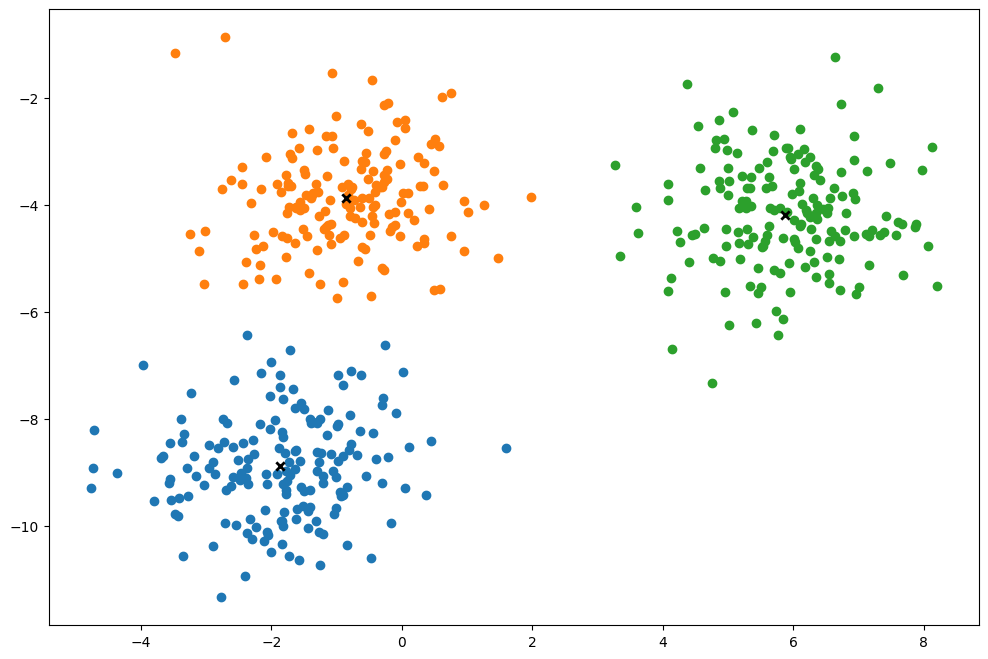

In [10]:
np.random.seed(42)
from sklearn.datasets import make_blobs

X, y = make_blobs(
    centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(k=clusters, max_itr=150, plot_steps=False)
y_pred = k.predict(X)

k.plot()

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
class_names = iris.target_names
X_train, X_test = train_test_split(X, test_size=0.3, random_state=1)

k = KMeans(k=3)
k.fit(X_train)

y_pred = k.predict(X_train)

y_pred = y_pred.astype(int)

AttributeError: 'KMeans' object has no attribute 'fit'